In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
import random
import tensorflow as tf
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [40]:
df=pd.read_csv('C:/Users/ASHWINI/Downloads/Fraud.csv')

In [41]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Data cleaning including missing values, outliers and multi-collinearity.

Once the data is captured, the next step will be to clean the data or we can say we need to pre-process the data.
1. Handling missing values in the dataset
    Missing or null values can be handled in two ways:
    1. Removing the null values --> This step can lead to data reduction if number of null values is huge
    2. Replacing the null values with mean or mode of the dataset.
2. Collinearity 
3. Outliers
    To check the outliers we have distributed the data in the variables. Performing this action we get the data is skewed to the right and we need to normalize the data but removing the outliers. The steps are given below.

In [42]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [43]:
print(df.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [44]:
type = df.type.value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(df, values=quantity, names=transactions, hole = 0.5, title="Distribution of Transaction Type")
figure.show()

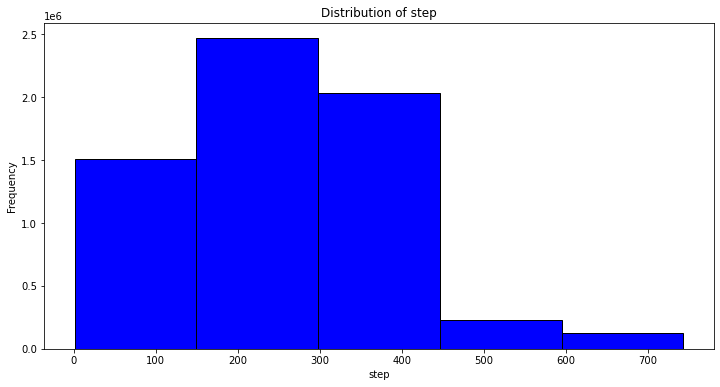

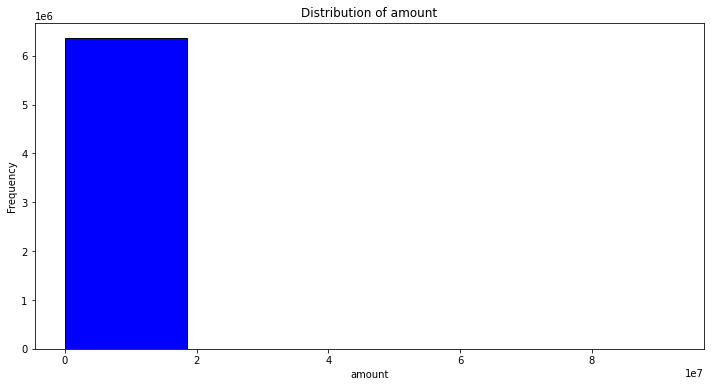

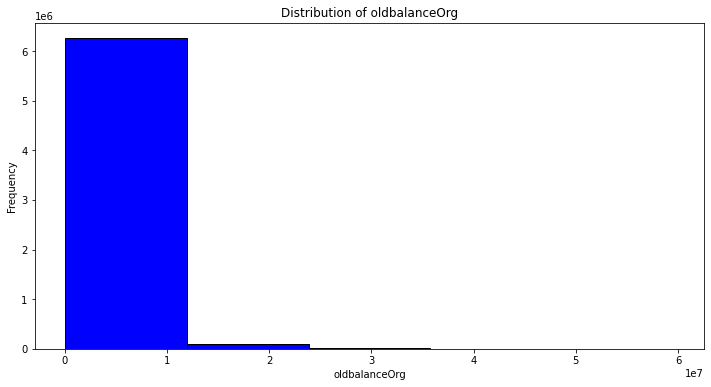

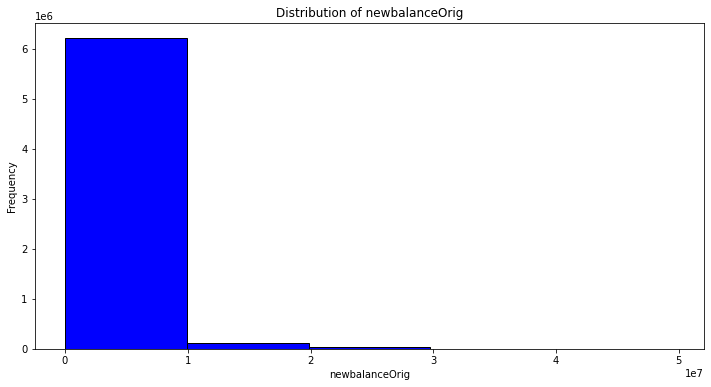

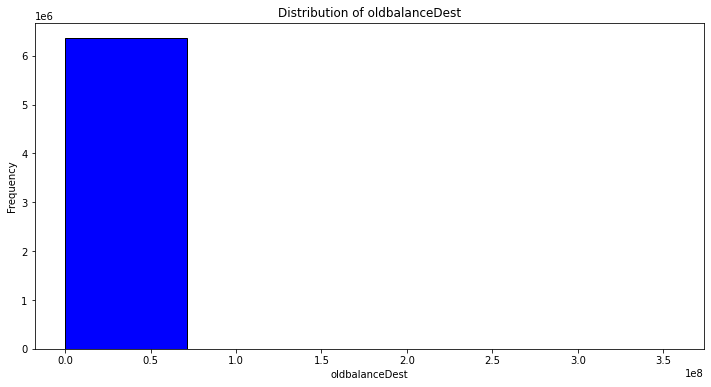

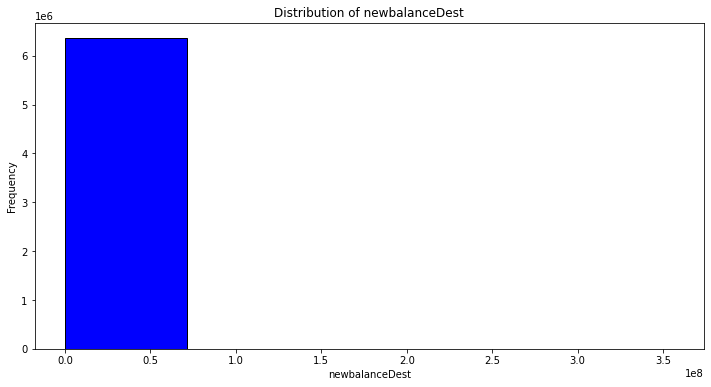

In [45]:
feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='blue',edgecolor='black')
    plt.title(f"Distribution of {i}")
    plt.show()

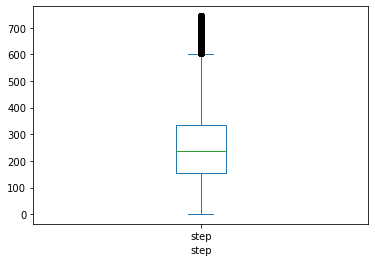

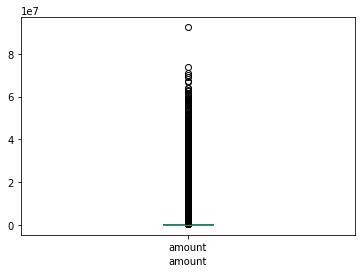

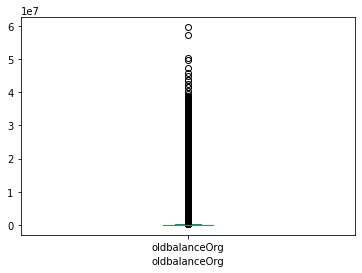

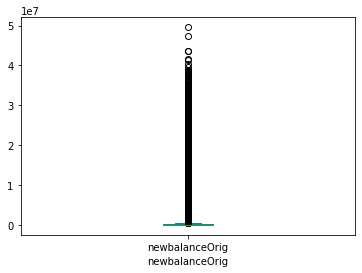

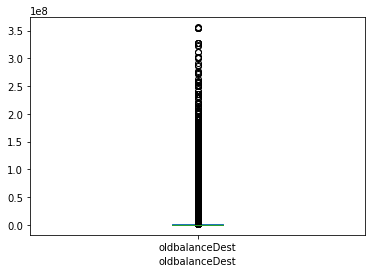

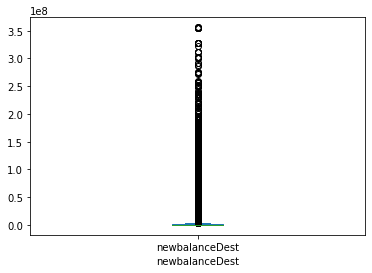

In [46]:
feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='box')
    plt.show()

As we can see the variable step is more skewed as compared to others, there is a possibility of it being an outlier.

In [47]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046460444556197


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




# Distribution of variables after removing the outliers

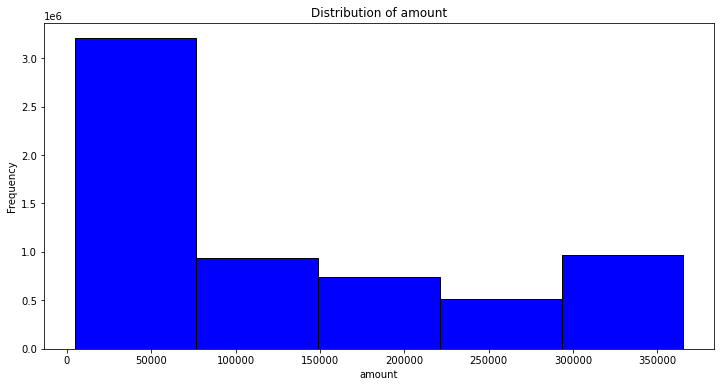

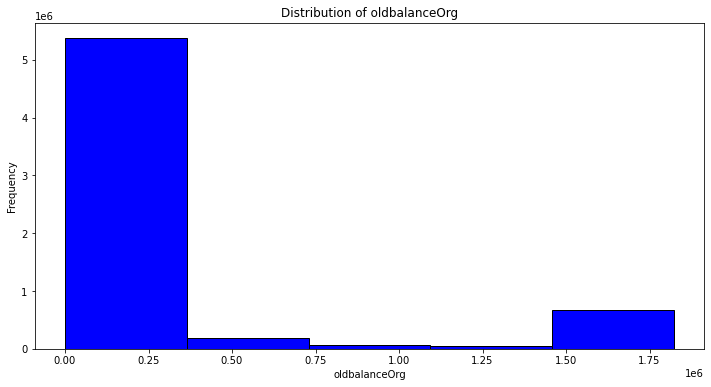

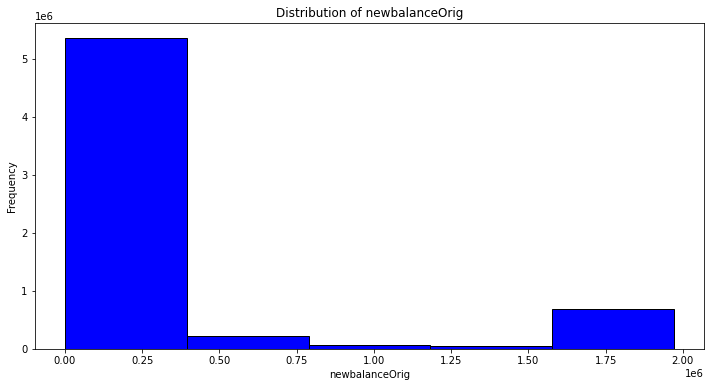

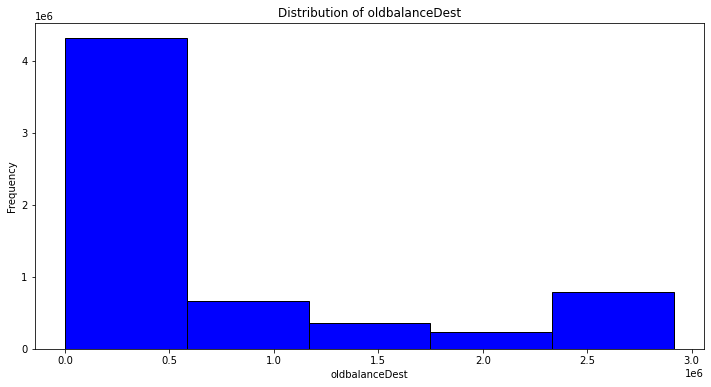

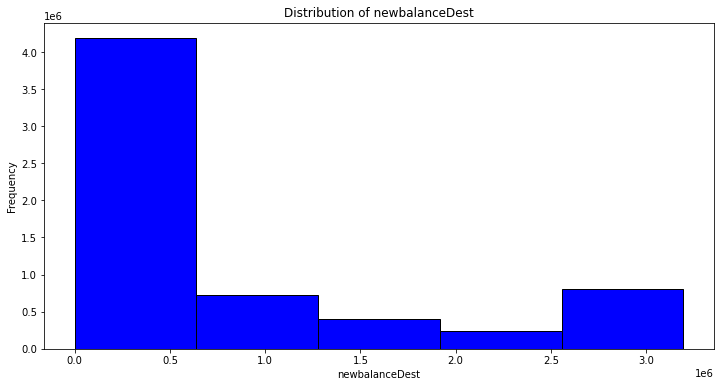

In [48]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='blue',edgecolor='black')
    plt.title(f"Distribution of {i}")
    plt.show()

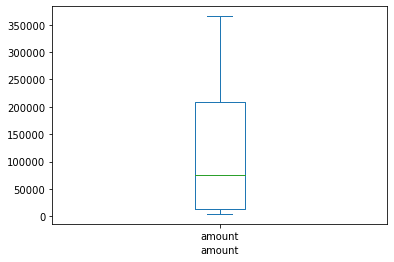

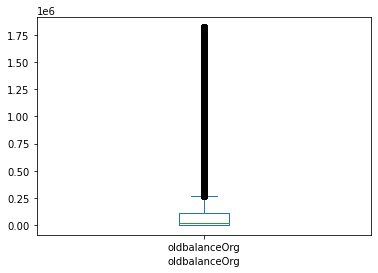

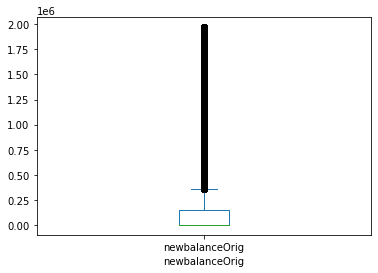

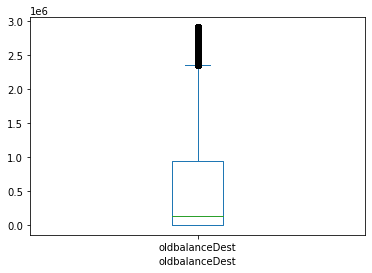

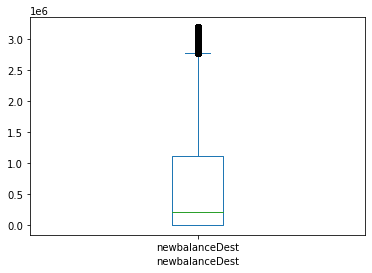

In [49]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='box')
    plt.show()

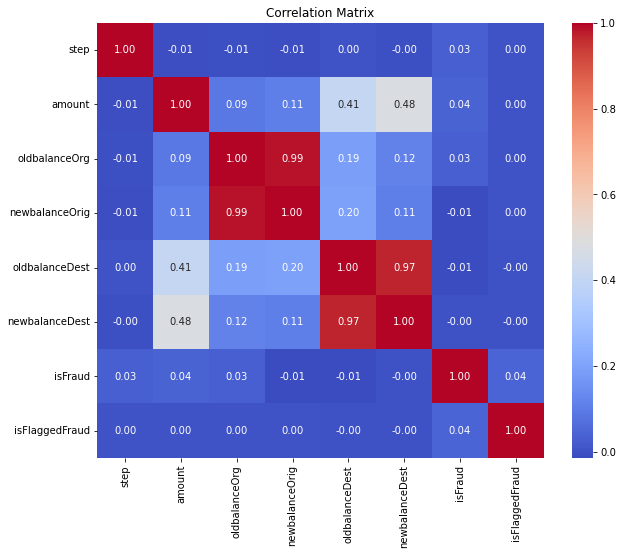

In [50]:
# Create a correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [52]:
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

In [54]:
CrosstabResult=pd.crosstab(index=df.type,columns=df.isFraud)
CrosstabResult

isFraud,0,1
type,,
0,2151495,0
1,1399284,0
2,41432,0
3,2233384,4116
4,528812,4097


(3500.0, 7000.0)

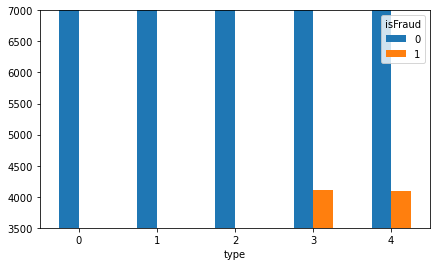

In [55]:
# Grouped bar chart between TYPE and ISFRAUD by changing ylimit to view isFraud values
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.ylim([3500, 7000])

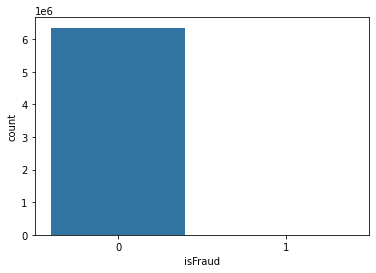

In [56]:
# count plot on single categorical variable
sns.countplot(x ='isFraud', data = df)
 
# Show the plot
plt.show()

In [57]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

# Describe your fraud detection model in elaboration.

Following are the steps we have taken to build the online transaction fraud detection:

1. Data Preprocessing:
    The data pre-processing step is performed to ensure that the data on which we are working is clean and not having any null value or outlier to hamper the model's accuracy.
    
    
2. Model Selection:
    As we have the labeled data to work on we can use supervised learning models.
    I have used two of the Supervised Learning Models according to my experience in machine learning model building:
    Logistic Regression: Suitable for binary classification tasks and provides interpretable results.
    Random Forests or Gradient Boosting: Effective in capturing complex relationships and feature interactions.
    
    After training both the models, we can say random forest is the best algorithm which provide accuracy of 99%.
    
    
3. Model Evaluation:
    Split the data into training and testing sets.
    Evaluate the model using metrics such as precision, recall, F1-score, and area under the ROC curve (AUC-ROC).
    Optimize the model parameters for better performance.
    

In [59]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay


seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)


X = df.copy()
#X.drop(['nameOrig', 'newbalanceOrig', 'nameDest', 'newbalanceDest', 'oldbalanceOrg', 'oldbalanceDest'], axis=1, inplace=True)
X.drop(['step','nameOrig','nameDest','oldbalanceDest','newbalanceDest','isFlaggedFraud'], axis=1, inplace=True)
y = X.pop('isFraud')


skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)


X_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)

In [60]:
def model_comparison_evaluate(classifiers, X, y):
    print('K-Fold Cross-Validation:\n')
    for name, model in classifiers.items():
        print('{}:'.format(name))
        
        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
        
        for score in scoring:
            scores = cross_val_score(model, X, y, scoring=score, cv=skfold, n_jobs=-1)
            print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))
            
        print('\n')

In [61]:
classifiers = { 'Random Forest Classifier':RandomForestClassifier(class_weight='balanced', random_state=seed),
                'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=seed)
              }

In [62]:
model_comparison_evaluate(classifiers, X_train, y_train)

K-Fold Cross-Validation:

Random Forest Classifier:
Mean accuracy score: 0.990 (0.001)
Mean precision score: 0.989 (0.003)
Mean recall score: 0.992 (0.002)
Mean f1 score: 0.990 (0.001)
Mean roc_auc score: 0.997 (0.001)


Logistic Regression:
Mean accuracy score: 0.942 (0.005)
Mean precision score: 0.936 (0.009)
Mean recall score: 0.950 (0.009)
Mean f1 score: 0.943 (0.005)
Mean roc_auc score: 0.985 (0.002)




Random Forest Classifier:
               precision    recall  f1-score   support

Non-Fraud [0]       0.99      1.00      1.00   1258322
    Fraud [1]       0.99      0.11      0.21     14202

     accuracy                           0.99   1272524
    macro avg       0.99      0.56      0.60   1272524
 weighted avg       0.99      0.99      0.99   1272524
 



Text(0.5, 0, 'False Positive Rate')

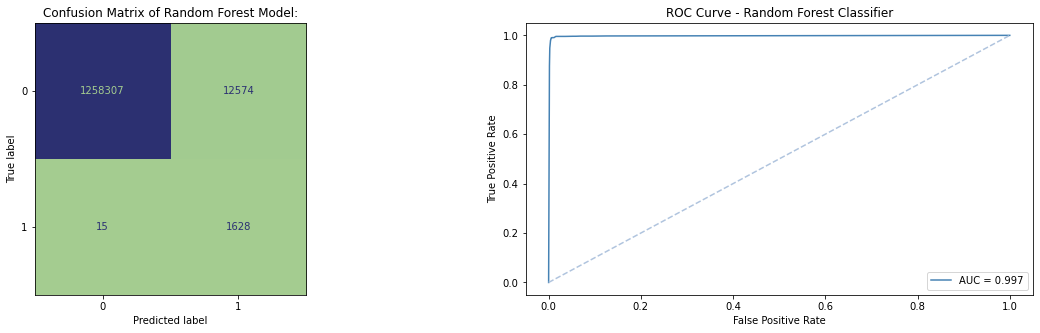

In [63]:
model = RandomForestClassifier(class_weight='balanced', random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_score = model.predict_proba(X_test)[:,1]
print('Random Forest Classifier:')
print(classification_report(y_pred, y_test, labels=[0,1], target_names=['Non-Fraud [0]', 'Fraud [1]']), '\n')



fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of Random Forest Model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)



fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
roc_auc = auc(fpr, tpr)                       
ax[1].set_title('ROC Curve - Random Forest Classifier')
ax[1].plot(fpr, tpr, label = 'AUC = %0.3f' % roc_auc, c='steelblue')
ax[1].plot([0,1],[0,1],'--', c='lightsteelblue')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

In [64]:
features = np.array([[1, 8900.2, 8990.2, 0.0]])
print(model.predict(features))

[0]


C:\Users\ASHWINI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



# How did you select variables to be included in the model?

I have done correlation analysis to eliminate highly correlated variables. 


# Demonstrate the performance of the model by using best set of tools.

Use tools like Python with libraries such as Scikit-learn, TensorFlow, or PyTorch.
Evaluate the model using metrics like precision, recall, F1-score, and area under the ROC curve (AUC-ROC).
Employ cross-validation to ensure robustness.

# What are the key factors that predict fraudulent customer?

Variables indicating unusual behavior, high transaction frequency, unusual transaction times. As we have seen the type of the transaction is also a key factor which can predict the fradulent customer.
Behavioral patterns that deviate from the norm, such as sudden changes in spending habits or accessing the account from new devices.

# Do these factors make sense? If yes, How? If not, How not?

Yes, these factors make sense. Fraudsters often exhibit atypical patterns in their activities. Unusual transaction frequencies or locations, abrupt changes in behavior, and anomalous transaction amounts are logical indicators of potential fraud.

# What kind of prevention should be adopted while company update its infrastructure?

Regularly update and patch security systems.
Implement multi-factor authentication.
Monitor network traffic and user behavior for anomalies.
Educate employees and customers about security best practices.

# Assuming these actions have been implemented, how would you determine if they work?

Monitor fraud incidents over time and compare pre- and post-implementation statistics.
Use Key Performance Indicators (KPIs) such as the reduction in fraud rates, false positives, and customer satisfaction.
Conduct regular security audits and penetration testing to identify vulnerabilities.